In [1]:
pip install understatapi

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import understatapi

client = understatapi.UnderstatClient()

team_match_data = client.team(team="Manchester_City").get_match_data(season="2022")

In [12]:
all_data = []

for x in team_match_data:
    print(x["id"])
    shot_data = client.match(match=x["id"]).get_shot_data()
    all_data.extend(shot_data['h'])
    all_data.extend(shot_data['a'])

18211
18214
18230
18237
18246
18258
18274
18289
18298
18307
18326
18338
18346
18356
18368
18376
18385
18397
18267
18409
18420
18429
18312
18439
18442
18458
18463
18488
18499
18506
18531
18537
18478
18546
18557
18566
18515
18574


In [13]:
import pandas as pd

df = pd.DataFrame(all_data)

In [14]:
df.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,479841,1,BlockedShot,0.9159999847412109,0.5690000152587891,0.07138650119304657,Michail Antonio,h,531,FromCorner,2022,LeftFoot,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Aaron Cresswell,Cross
1,479842,2,BlockedShot,0.8880000305175781,0.4809999847412109,0.039106398820877075,Jarrod Bowen,h,1776,FromCorner,2022,Head,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,None,None
2,479843,2,MissedShots,0.909000015258789,0.5029999923706054,0.03939180076122284,Michail Antonio,h,531,FromCorner,2022,Head,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Pablo Fornals,Aerial
3,479850,53,MissedShots,0.8480000305175781,0.5070000076293946,0.06041960045695305,Declan Rice,h,5553,OpenPlay,2022,RightFoot,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,None,None
4,479851,55,BlockedShot,0.6809999847412109,0.395,0.012050599791109562,Manuel Lanzini,h,535,OpenPlay,2022,RightFoot,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Pablo Fornals,Pass


In [15]:
df_eh = df[df['player'] == 'Erling Haaland']

In [16]:
df_eh

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
8,479846,20,MissedShots,0.9359999847412109,0.5029999923706054,0.48408499360084534,Erling Haaland,a,8260,OpenPlay,2022,Head,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Phil Foden,Cross
9,479847,35,Goal,0.885,0.5,0.7611690163612366,Erling Haaland,a,8260,Penalty,2022,LeftFoot,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,None,Standard
13,479854,64,Goal,0.8640000152587891,0.405,0.32805299758911133,Erling Haaland,a,8260,OpenPlay,2022,LeftFoot,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Kevin De Bruyne,Throughball
14,479855,69,MissedShots,0.9530000305175781,0.5520000076293945,0.5266079902648926,Erling Haaland,a,8260,OpenPlay,2022,Head,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Jack Grealish,Chipped
15,479856,75,BlockedShot,0.894000015258789,0.71,0.06644280254840851,Erling Haaland,a,8260,OpenPlay,2022,LeftFoot,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Ilkay Gündogan,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,528607,5,MissedShots,0.96,0.46,0.5399767160415649,Erling Haaland,a,8260,OpenPlay,2022,Head,18515,Brighton,Manchester City,1,1,2023-05-24 19:00:00,Phil Foden,Chipped
857,528612,20,SavedShot,0.9009999847412109,0.539000015258789,0.4356217682361603,Erling Haaland,a,8260,OpenPlay,2022,LeftFoot,18515,Brighton,Manchester City,1,1,2023-05-24 19:00:00,Phil Foden,Pass
861,528623,47,MissedShots,0.8540000152587891,0.5320000076293945,0.06592796742916107,Erling Haaland,a,8260,OpenPlay,2022,LeftFoot,18515,Brighton,Manchester City,1,1,2023-05-24 19:00:00,Bernardo Silva,Cross
865,528634,65,MissedShots,0.8630000305175781,0.7030000305175781,0.02927715890109539,Erling Haaland,a,8260,OpenPlay,2022,LeftFoot,18515,Brighton,Manchester City,1,1,2023-05-24 19:00:00,Julián Álvarez,Chipped


In [20]:
df_eh_shots = df[df['result'] == 'Goal']

In [21]:
df_eh_shots

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
9,479847,35,Goal,0.885,0.5,0.7611690163612366,Erling Haaland,a,8260,Penalty,2022,LeftFoot,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,None,Standard
13,479854,64,Goal,0.8640000152587891,0.405,0.32805299758911133,Erling Haaland,a,8260,OpenPlay,2022,LeftFoot,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Kevin De Bruyne,Throughball
27,480312,18,Goal,0.8980000305175782,0.5509999847412109,0.41682299971580505,Ilkay Gündogan,h,314,OpenPlay,2022,LeftFoot,18214,Manchester City,Bournemouth,4,0,2022-08-13 14:00:00,Erling Haaland,Pass
29,480315,30,Goal,0.8680000305175781,0.355,0.08257029950618744,Kevin De Bruyne,h,447,OpenPlay,2022,RightFoot,18214,Manchester City,Bournemouth,4,0,2022-08-13 14:00:00,Phil Foden,Pass
30,480317,36,Goal,0.9109999847412109,0.5879999923706055,0.15662600100040436,Phil Foden,h,6055,OpenPlay,2022,LeftFoot,18214,Manchester City,Bournemouth,4,0,2022-08-13 14:00:00,Kevin De Bruyne,Throughball
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,526445,50,Goal,0.7980000305175782,0.6459999847412109,0.08491066098213196,Ilkay Gündogan,a,314,DirectFreekick,2022,RightFoot,18557,Everton,Manchester City,0,3,2023-05-14 13:00:00,None,Standard
810,528091,11,Goal,0.855,0.41700000762939454,0.35535696148872375,Julián Álvarez,h,10846,OpenPlay,2022,RightFoot,18566,Manchester City,Chelsea,1,0,2023-05-21 15:00:00,Cole Palmer,Pass
845,528621,37,Goal,0.7219999694824218,0.644000015258789,0.016079405322670937,Julio Enciso,h,11058,OpenPlay,2022,RightFoot,18515,Brighton,Manchester City,1,1,2023-05-24 19:00:00,Levi Colwill,Pass
859,528615,24,Goal,0.915,0.5879999923706055,0.39866024255752563,Phil Foden,a,6055,OpenPlay,2022,RightFoot,18515,Brighton,Manchester City,1,1,2023-05-24 19:00:00,Erling Haaland,Pass


# Erling Haaland Shots (Using Understats)

In [52]:
pip install --upgrade mplsoccer

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import numpy as np

from mplsoccer import VerticalPitch, Pitch
from mplsoccer.cm import create_transparent_cmap
from mplsoccer.scatterutils import arrowhead_marker
from mplsoccer.utils import FontManager

link = "https://understat.com/player/8260"

res = requests.get(link)
soup = BeautifulSoup(res.content,'lxml')
scripts = soup.find_all('script')

strings = scripts[3].string

ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')
data = json.loads(json_data)

shots = pd.DataFrame(data) # Erling Haaland shot data
# Changing data type
shots['xG'] = shots['xG'].astype('float64')
shots['X'] = shots['X'].astype('float64')
shots['Y'] = shots['Y'].astype('float64')

shots['X1'] = (shots['X'])*100
shots['Y1'] = (shots['Y'])*100
# Original X and Y
shots['X'] = (shots['X'])*100
shots['Y'] = (shots['Y'])*100

total_shots = shots[shots.columns[0]].count().tolist()
xGcum = np.round(max(np.cumsum(shots['xG'])),3).tolist()
xG_per_shot = np.round(max(np.cumsum(shots['xG']))/(shots[shots.columns[0]].count()),3).tolist()
goal = shots[shots['result']=='Goal']
shot_on_post = shots[shots['result']=='ShotOnPost']
blocked_shot = shots[shots['result']=='BlockedShot']
saved_shot = shots[shots['result']=='SavedShot']
missed_shot = shots[shots['result']=='MissedShot']
goals = goal[goal.columns[0]].count().tolist()

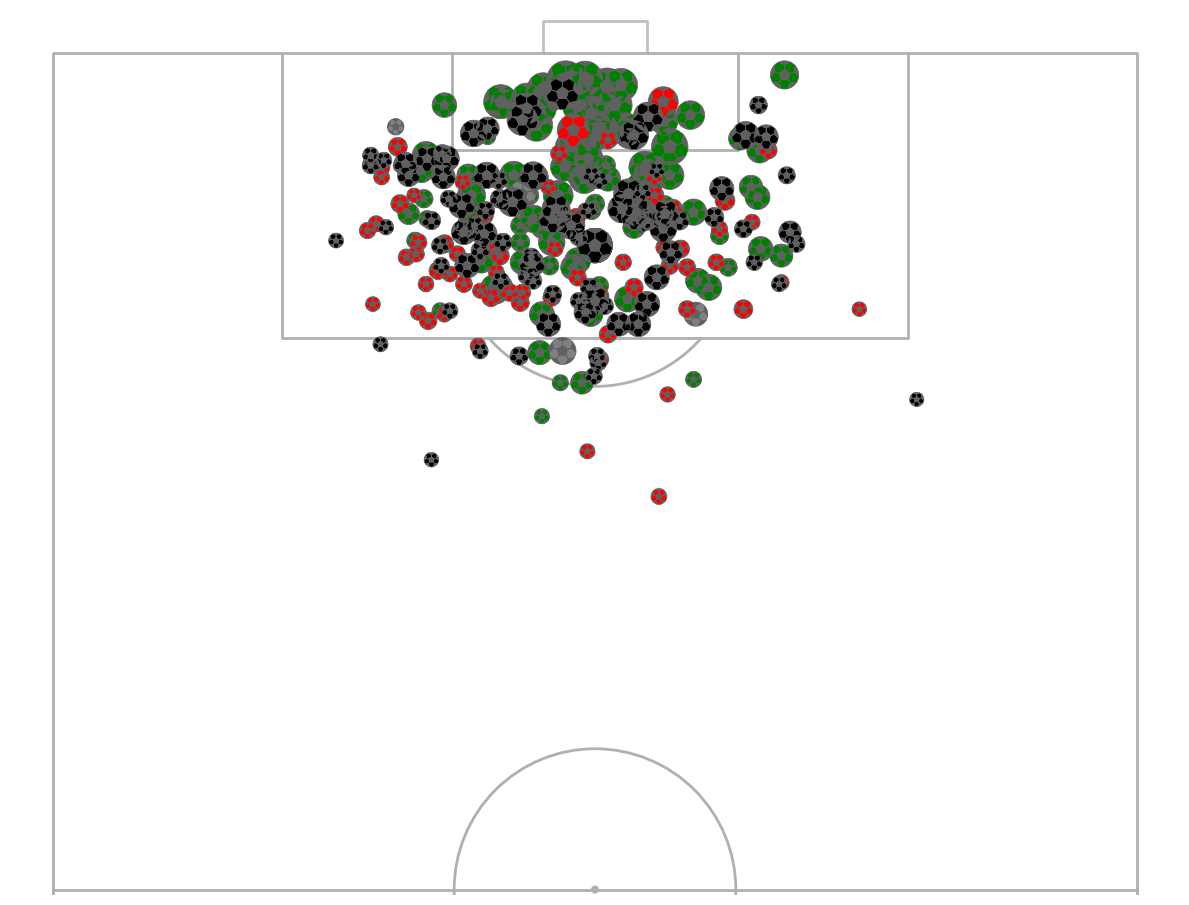

In [3]:
pitch = VerticalPitch(pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=True,  # half of a pitch
                      goal_type='box',
                      goal_alpha=0.8,
                      pitch_type='opta') # The measurements for Stats Perform are 105x68
# Main code
fig, ax = pitch.draw(figsize=(12, 10))

# Plotting each shot result with a different color
sc1 = pitch.scatter(goal['X'],
                    goal['Y'],
                    edgecolors='#606060',  # charcoal border
                    c='green',  # color for goals
                    s=(goal["xG"] * 720) + 100,
                    marker='football',
                    ax=ax)

sc2 = pitch.scatter(shot_on_post['X'],
                    shot_on_post['Y'],
                    edgecolors='#606060',
                    c='grey',  # color for shots on post
                    s=(shot_on_post["xG"] * 720) + 100,
                    marker='football',
                    ax=ax)

sc3 = pitch.scatter(blocked_shot['X'],
                    blocked_shot['Y'],
                    edgecolors='#606060',
                    c='red',  # color for blocked shots
                    s=(blocked_shot["xG"] * 720) + 100,
                    marker='football',
                    ax=ax)

sc4 = pitch.scatter(saved_shot['X'],
                    saved_shot['Y'],
                    edgecolors='#606060',
                    c='black',  # color for saved shots
                    s=(saved_shot["xG"] * 720) + 100,
                    marker='football',
                    ax=ax)

sc5 = pitch.scatter(missed_shot['X'],
                    missed_shot['Y'],
                    edgecolors='#606060',
                    c='orange',  # color for missed shots
                    s=(missed_shot["xG"] * 720) + 100,
                    marker='football',
                    ax=ax)

plt.show()